## How to use this script

This script validates an algorithmic framework similar to that of `curvatubes` (PyTorch + external optimizer),\
but in the special case of the L^2 Willmore flow. It contains the following experiments:

- **Exp 1a** - Sphere (not very interesting)
- **Exp 1b** - Clifford torus
- **Exp 1c** - Lawson surface of genus 2

For more details, please refer to my paper [here](https://arxiv.org/abs/2103.04856)!

**If you find any problem in this script**, please contact me at a.song19@imperial.ac.uk.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import string
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import torch
dtype = torch.cuda.FloatTensor

# curvatubes imports
from cvtub.utils import slices, single, load_nii, save_nii, random_init, init_balls
from cvtub.energy import discrepancy, ratio_discr


# Experiment 1 - Validation with Willmore minimizers

In [4]:
# Create some folders to save the results

snapshot_folder = '../results/Experiment_1/'

if not os.path.exists(snapshot_folder):
    print(snapshot_folder + ' folder does not exist, creating it...')
    os.makedirs(snapshot_folder)
if not os.path.exists(snapshot_folder + 'Curves/'):
    print('Curves subfolder does not exist, creating it...')
    os.makedirs(snapshot_folder + 'Curves/')


In [7]:
# Main function that makes the Willmore flow

from cvtub.generator import _generate_shape

def Willmore_flow(v0, maxeval = 1000, display_all = True) :  
    '''
        L2 flow of the Willmore phase-field
    
            Feps(u) = integral of (1/eps) { ( eps Lap(u) - W'(u) / eps )^2  } dx^3
            
        which is a diffuse approximation of the Willmore energy
            
            F(S)    = integral on S of { H^2 } dA
            
            where H = kap_1 + kap_2 is the mean curvature
    
    '''
    
    delta_x = 1/100
    eps = 0.04
    a20, a11, a02, b10, b01, c = 1,2,1,0,0,0 # polynomial coeffs corresponding to (kap_1 + kap_2)^2
    params = eps, a20, a11, a02, b10, b01, c
    xi =  1e-6
    flow_type = 'L2'
    mode = 'replicate'
    optim_method = 'bfgs'
    sigma_blur = 1
    Z,X,Y = v0.shape

    # BFGS internal parameters
    optim_props = {'maxeval': maxeval, 'sigma_blur': sigma_blur, 'lr': 1, #.01, # lr = learning_rate
                   'bfgs_max_iter' : 20, 'history_size' : 10, 'line_search_fn' : 'strong_wolfe',
                   'display_it_nb' : 500, 'fill_curve_nb' : 50} # display / fill curve every ... its
        
    u, E = _generate_shape(v0, params, delta_x, xi, optim_method, optim_props, flow_type, mode,
                           snapshot_folder = snapshot_folder, display_all = display_all,
                           return_energy = True)
    
    torch.cuda.empty_cache()

    return u.detach().cpu().numpy(), E

def compare_relative(val, target_val) :
    print('value = {}'.format(val))
    print('target value = {}'.format(target_val))
    print('{} % of relative error'.format(100 * np.abs(val - target_val) / target_val))


### A note on the size of the simulation domain in replicate mode:

When initializing the phase-field u with values close to +1 or -1, make sure that there is enough -1 values
between the shape and the boundary of the simulation domain. Otherwise, after touching the boundary during the
flow, the shape tends to become perpendicular to it because of the replicate conditions.

That is why the simulations below are run on a domain much larger than the central region where
interesting things happen. However, the bigger the shape is, the better the approximation
of the original sharp-interface problem is (but then computation time also becomes longer).

## Exp 1a : a ball (not so interesting, you can skip this)

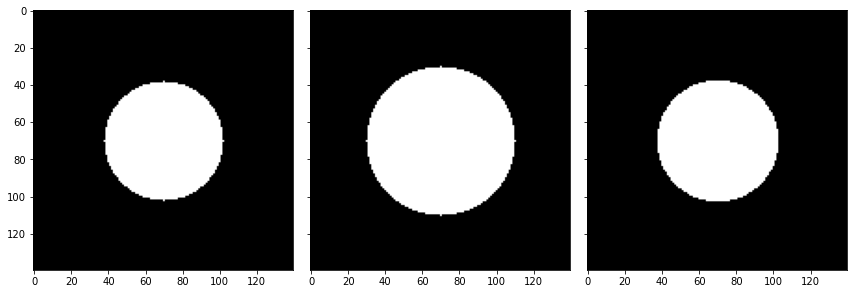

In [12]:
# Initialize a ball

from cvtub.utils import init_custom_balls

Z,X,Y = 140,140,140 
v0 = init_custom_balls((Z,X,Y), N_balls = 1, option = '', mode = 'replicate', r_pix = 40)
slices(v0)
# sizes used in the paper: Z,X,Y = 200,200,200 and r_pix = 80


polykap_deg2 bfgs L2 replicate coeffs [1 2 1 0 0 0]
dx = 0.010 LZ = 1.40 LX = 1.400 LY = 1.400 xi = 1e-06
{'maxeval': 1000, 'sigma_blur': 1, 'lr': 1, 'bfgs_max_iter': 20, 'history_size': 10, 'line_search_fn': 'strong_wolfe', 'display_it_nb': 500, 'fill_curve_nb': 50}

 umin = -1.0000009536743164, umax = 1.0000015497207642
 m =  -0.805 

E = 37180.890625
at BFGS iteration 1 and eval 25,   umin = -1.0024302005767822, umax = 1.0086942911148071


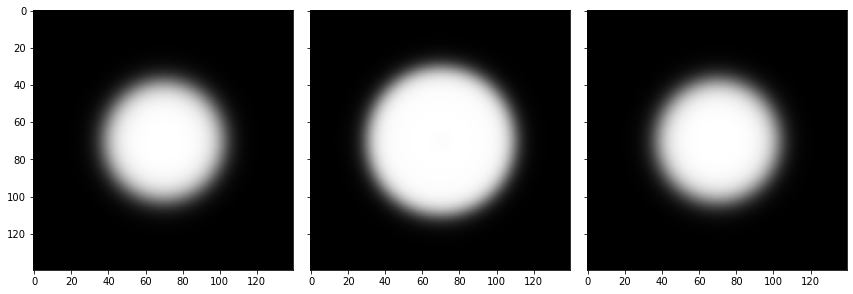

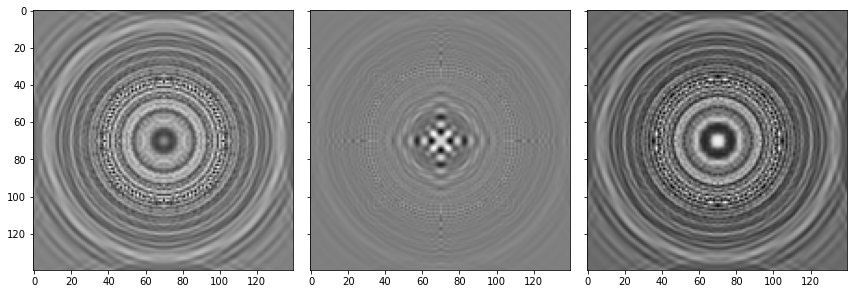


  100: E = 4.75e+01, 
  200: E = 4.73e+01, 
  300: E = 4.73e+01, 
  400: E = 4.72e+01, 
  500: E = 4.72e+01, 
 
 at eval 500
grad_L1mean = 2.9223e-06
latex_grad_max = 5.2117e-05
m =   -0.800 

E = 47.24741744995117
at BFGS iteration 25 and eval 510,   umin = -1.0000087022781372, umax = 1.000011682510376


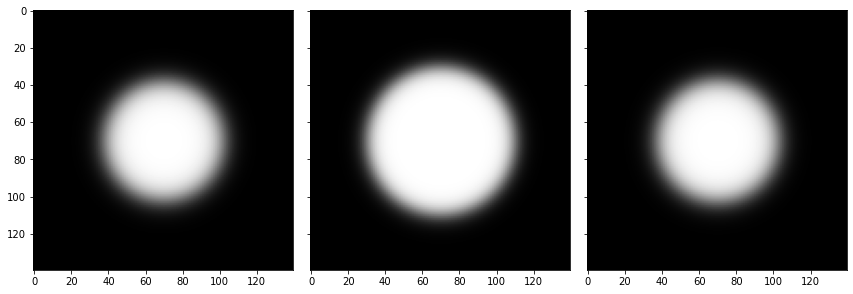

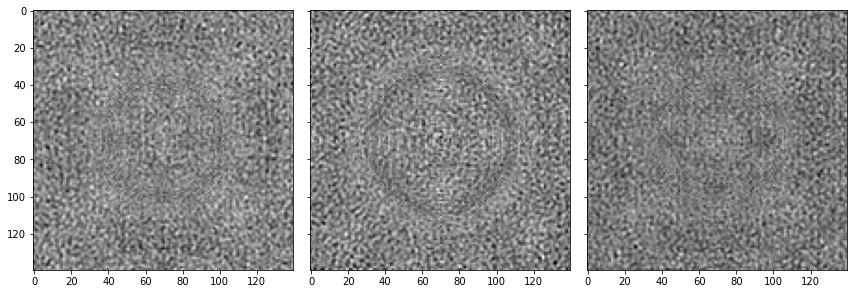


  600: E = 4.72e+01, 
  700: E = 4.72e+01, 
  800: E = 4.72e+01, 
  900: E = 4.72e+01, 
 1000: E = 4.72e+01, 
 
 at eval 1000
grad_L1mean = 1.8090e-06
latex_grad_max = 1.6545e-05
m =   -0.800 

E = 47.24421691894531
at BFGS iteration 91 and eval 1001,   umin = -1.0000072717666626, umax = 1.0000079870224


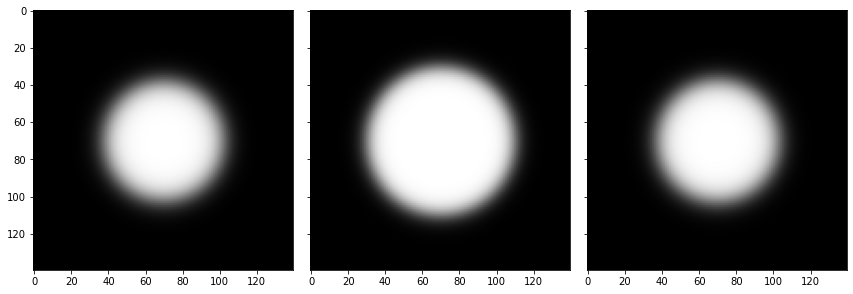

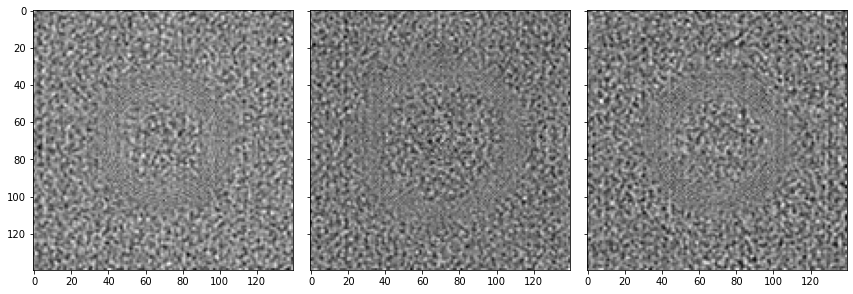

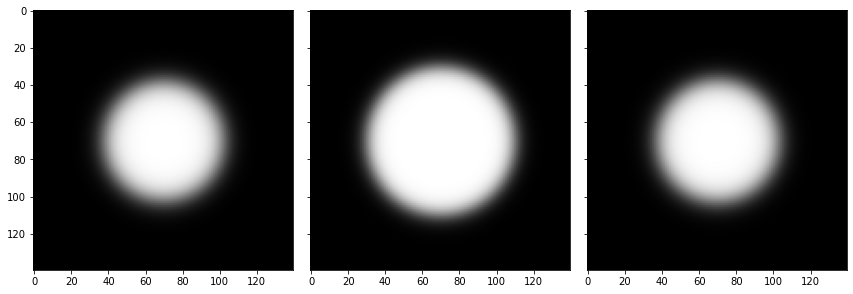

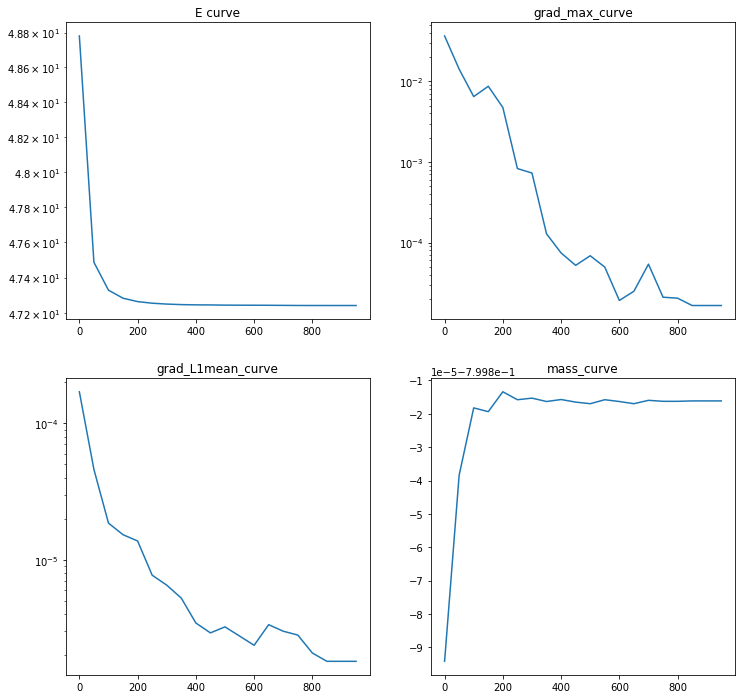


TOTAL DURATION IN SECONDS 50.0261492729187
E = 47.2442
polykap_deg2 bfgs L2 replicate coeffs [1 2 1 0 0 0]
dx = 0.010 LZ = 1.40 LX = 1.400 LY = 1.400 xi = 1e-06
{'maxeval': 1000, 'sigma_blur': 1, 'lr': 1, 'bfgs_max_iter': 20, 'history_size': 10, 'line_search_fn': 'strong_wolfe', 'display_it_nb': 500, 'fill_curve_nb': 50}


In [15]:
# Find a point of convergence of the flow ~ wait for 
# note: setting a smaller learning rate to optim_props of BFGS in Willmore_flow() improves the precision

u,E = Willmore_flow(v0, maxeval = 1000) # maxeval = 1000 in the paper

In [16]:
# Compare the final energy with the theoretical value

sigma = 4 / (3 * np.sqrt(2)) 
target_E = 4 * sigma * 4 * np.pi # 47.3907513403559
compare_relative(E, target_E)

value = 47.24421691894531
target value = 47.3907513403559
0.3092046807998234 % of relative error


## Exp 1b : a holed cube --> Clifford torus

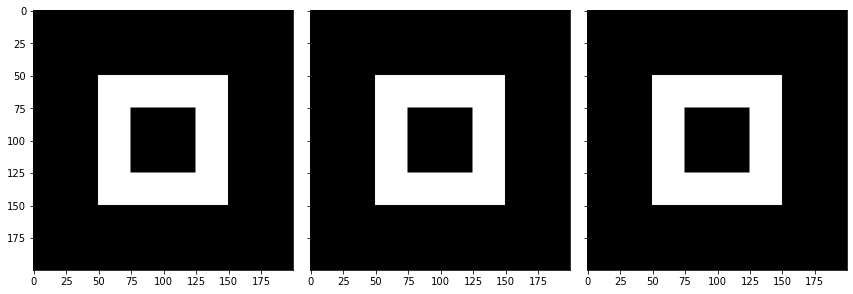

In [17]:
# Initialize a holed cube

from cvtub.utils import init_holed_cubes

Z,X,Y = 200,200,200
v0 = init_holed_cubes((Z,X,Y), N_cubes = 1, mode = 'replicate', R = 50, r = 25)
slices(v0)
# sizes used in the paper: Z,X,Y = 200,200,200 and R = 50 and r = 25

polykap_deg2 bfgs L2 replicate coeffs [1 2 1 0 0 0]
dx = 0.010 LZ = 2.00 LX = 2.000 LY = 2.000 xi = 1e-06
{'maxeval': 2000, 'sigma_blur': 1, 'lr': 1, 'bfgs_max_iter': 20, 'history_size': 10, 'line_search_fn': 'strong_wolfe', 'display_it_nb': 500, 'fill_curve_nb': 50}

 umin = -1.000001311302185, umax = 1.0000016689300537
 m =  -0.812 

E = 137789.46875
at BFGS iteration 1 and eval 25,   umin = -1.0120806694030762, umax = 0.9733496904373169


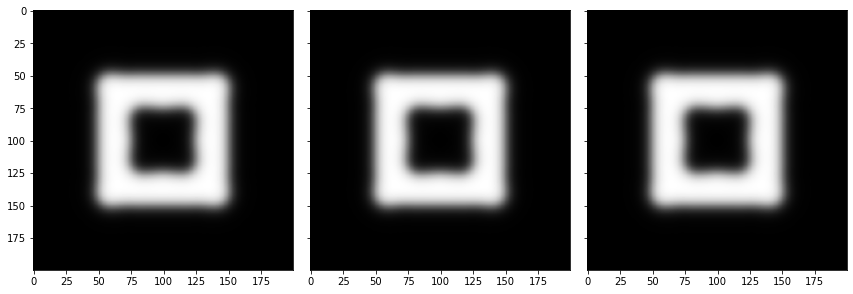

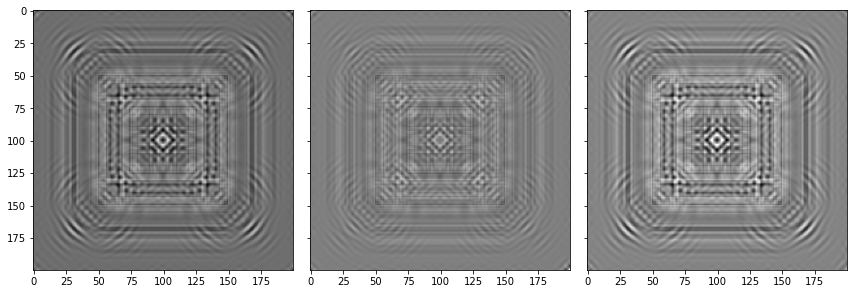


  100: E = 1.43e+02, 
  200: E = 1.13e+02, 
  300: E = 9.65e+01, 
  400: E = 9.32e+01, 
  500: E = 9.21e+01, 
 
 at eval 500
grad_L1mean = 2.4260e-05
latex_grad_max = 8.3244e-03
m =   -0.741 

E = 92.09148406982422
at BFGS iteration 24 and eval 510,   umin = -1.0012881755828857, umax = 0.9973715543746948


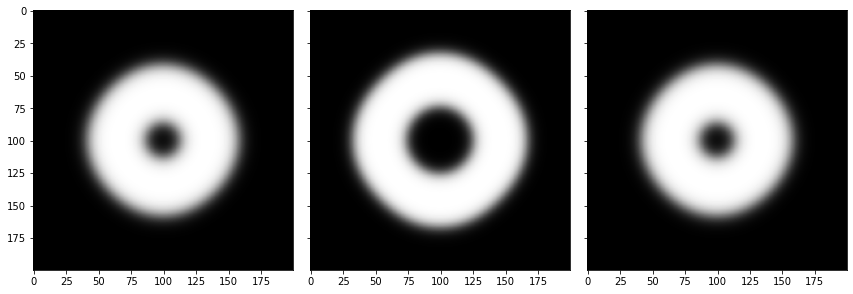

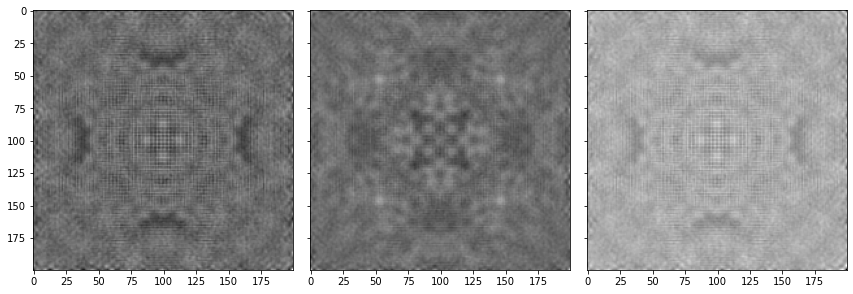


  600: E = 9.08e+01, 
  700: E = 8.94e+01, 
  800: E = 8.48e+01, 
  900: E = 8.23e+01, 
 1000: E = 7.78e+01, 
 
 at eval 1000
grad_L1mean = 5.1193e-05
latex_grad_max = 5.2708e-02
m =   -0.725 

E = 77.83118438720703
at BFGS iteration 48 and eval 1019,   umin = -1.0013206005096436, umax = 1.0001304149627686


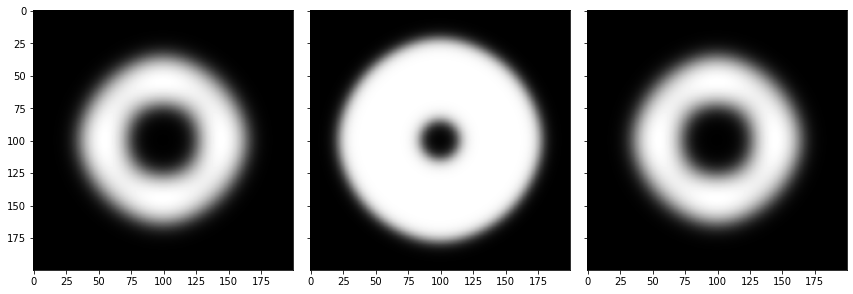

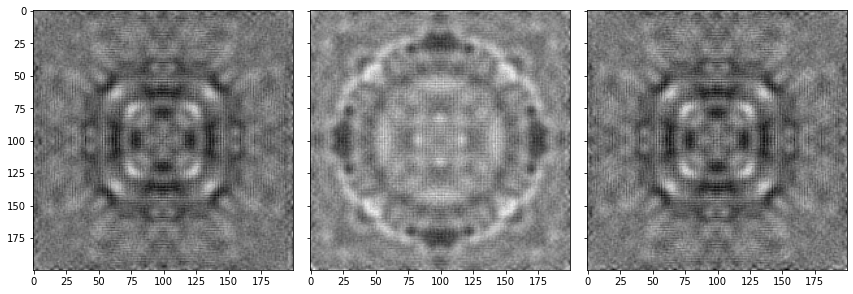


 1100: E = 7.58e+01, 
 1200: E = 7.53e+01, 
 1300: E = 7.49e+01, 
 1400: E = 7.49e+01, 
 1500: E = 7.48e+01, 
 
 at eval 1500
grad_L1mean = 6.6665e-06
latex_grad_max = 1.9862e-03
m =   -0.726 

E = 74.82164001464844
at BFGS iteration 71 and eval 1502,   umin = -1.0000883340835571, umax = 0.9999474883079529


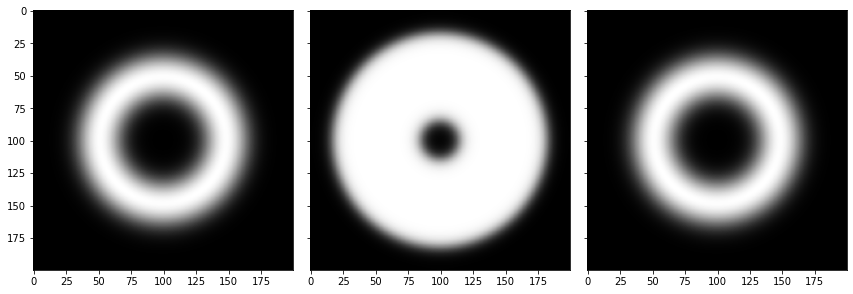

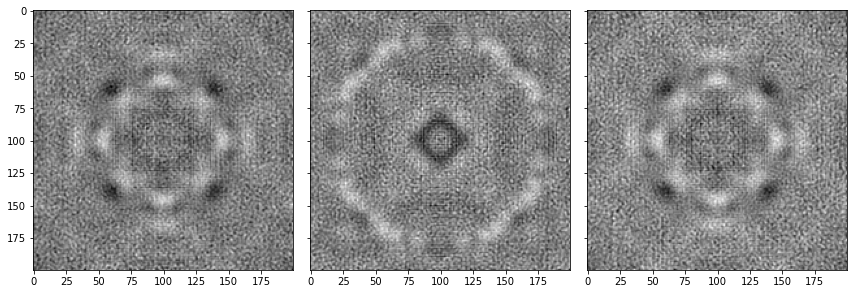


 1600: E = 7.48e+01, 
 1700: E = 7.48e+01, 
 1800: E = 7.48e+01, 
 1900: E = 7.48e+01, 
 2000: E = 7.48e+01, 
 
 at eval 2000
grad_L1mean = 3.8138e-06
latex_grad_max = 3.5698e-05
m =   -0.725 

at BFGS iteration 104 and eval 2000,   umin = -1.0000196695327759, umax = 0.9999300837516785


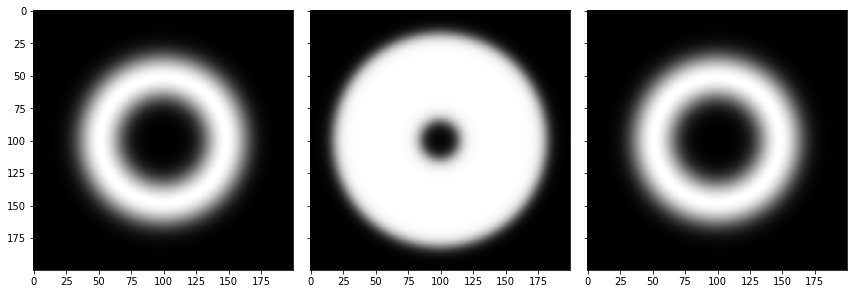

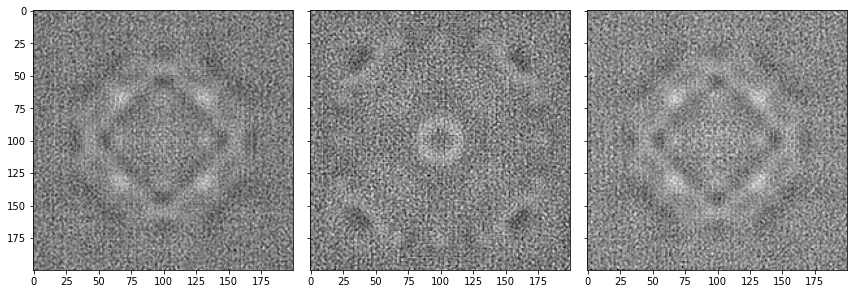

E = 74.79756164550781


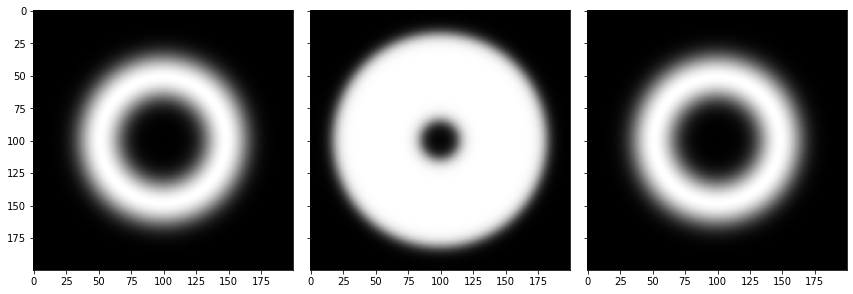

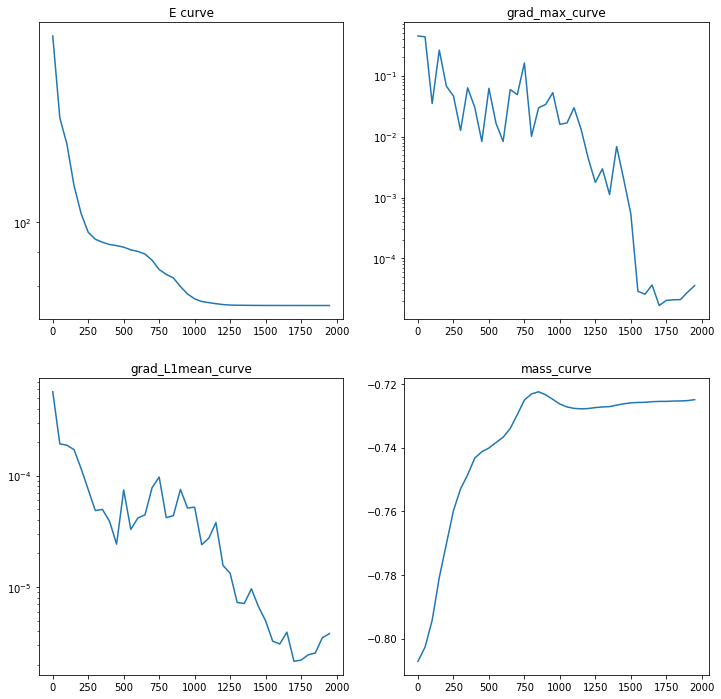


TOTAL DURATION IN SECONDS 262.64025378227234
E = 74.7960
polykap_deg2 bfgs L2 replicate coeffs [1 2 1 0 0 0]
dx = 0.010 LZ = 2.00 LX = 2.000 LY = 2.000 xi = 1e-06
{'maxeval': 2000, 'sigma_blur': 1, 'lr': 1, 'bfgs_max_iter': 20, 'history_size': 10, 'line_search_fn': 'strong_wolfe', 'display_it_nb': 500, 'fill_curve_nb': 50}


In [18]:
u,E = Willmore_flow(v0, maxeval = 1500) # maxeval = 2000 in the paper

In [19]:
# Compare the final energy with the theoretical value

sigma = 4 / (3 * np.sqrt(2)) 
target_E = 4 * sigma * 2 * np.pi**2 # 74.44121812948137
compare_relative(E, target_E)

value = 74.79596710205078
target value = 74.44121812948137
0.4765491235680323 % of relative error


## Exp 1c : two holed cubes --> Lawson surface of genus 2

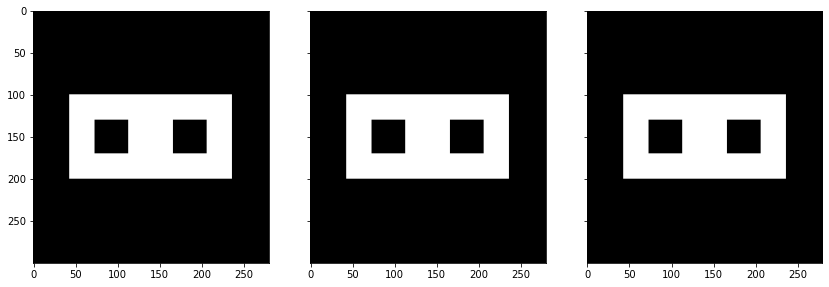

In [25]:
# Initialize two holed cubes

from cvtub.utils import init_holed_cubes

Z,X,Y = 150, 300, 280
v0 = init_holed_cubes((Z,X,Y), N_cubes = 2, option = 'close', R = 50, r = 20)
slices(v0)
# sizes used in the paper: Z,X,Y = 200, 300, 400 (huge) and option = 'very_close' and R = 50 and r = 20

polykap_deg2 bfgs L2 replicate coeffs [1 2 1 0 0 0]
dx = 0.010 LZ = 1.50 LX = 3.000 LY = 2.800 xi = 1e-06
{'maxeval': 4000, 'sigma_blur': 1, 'lr': 1, 'bfgs_max_iter': 20, 'history_size': 10, 'line_search_fn': 'strong_wolfe', 'display_it_nb': 500, 'fill_curve_nb': 50}

 umin = -1.000001072883606, umax = 1.0000014305114746
 m =  -0.744 

E = 225462.28125
at BFGS iteration 1 and eval 25,   umin = -1.006571888923645, umax = 1.0135306119918823


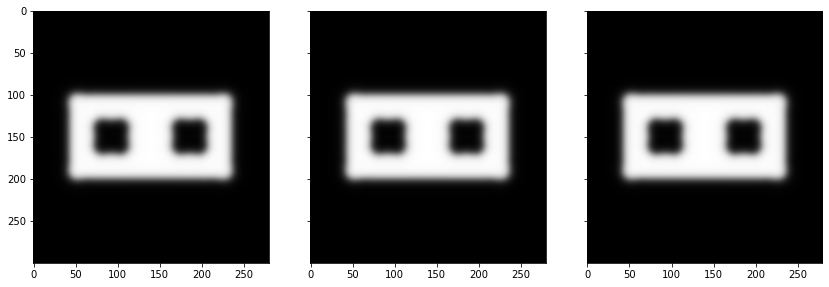

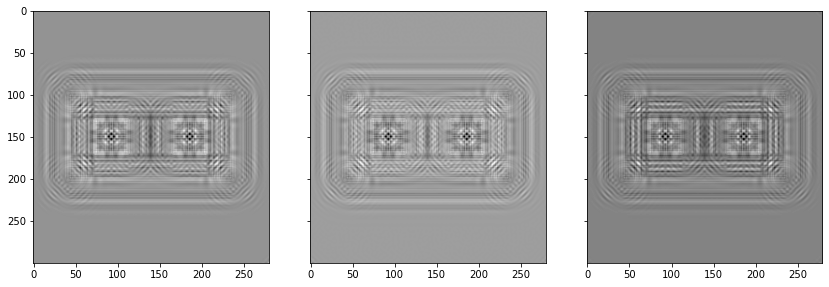


  100: E = 1.90e+02, 
  200: E = 1.61e+02, 
  300: E = 1.43e+02, 
  400: E = 1.36e+02, 
  500: E = 1.31e+02, 
 
 at eval 500
grad_L1mean = 6.5776e-05
latex_grad_max = 4.1688e-02
m =   -0.696 

E = 131.37315368652344
at BFGS iteration 24 and eval 514,   umin = -1.0042874813079834, umax = 1.0003913640975952


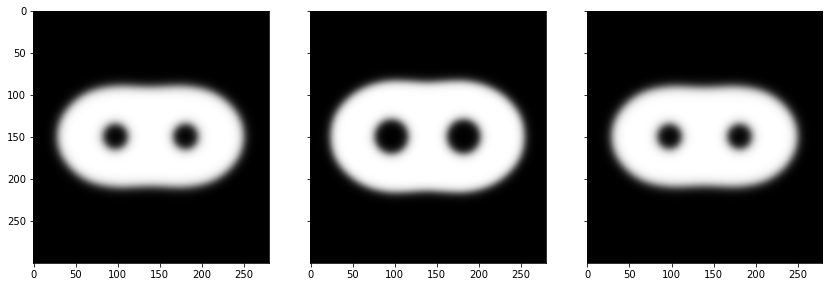

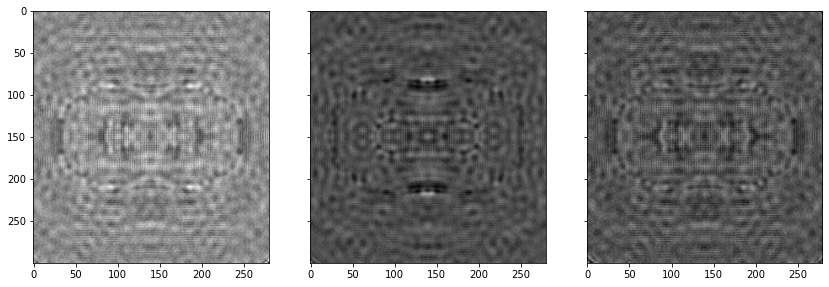


  600: E = 1.25e+02, 
  700: E = 1.16e+02, 
  800: E = 1.09e+02, 
  900: E = 1.03e+02, 
 1000: E = 9.75e+01, 
 
 at eval 1000
grad_L1mean = 4.9137e-05
latex_grad_max = 6.8674e-02
m =   -0.703 

E = 97.50283813476562
at BFGS iteration 48 and eval 1019,   umin = -1.003306269645691, umax = 1.0000886917114258


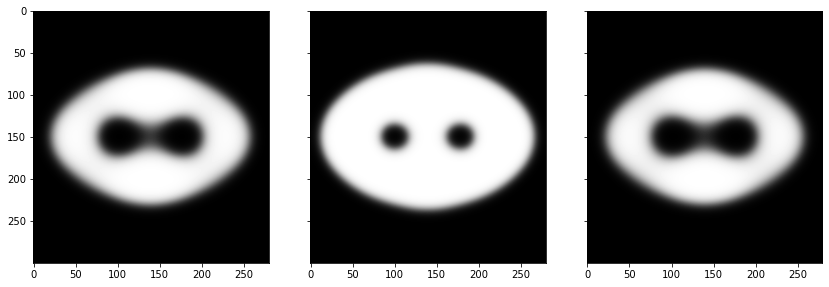

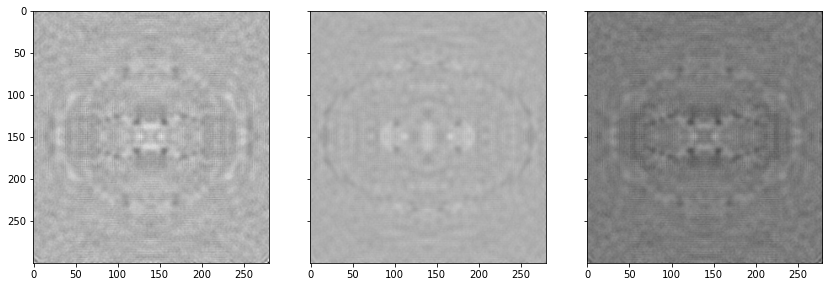


 1100: E = 9.45e+01, 
 1200: E = 9.25e+01, 
 1300: E = 9.07e+01, 
 1400: E = 8.92e+01, 
 1500: E = 8.83e+01, 
 
 at eval 1500
grad_L1mean = 1.5712e-05
latex_grad_max = 1.4567e-02
m =   -0.693 

E = 88.32262420654297
at BFGS iteration 71 and eval 1508,   umin = -1.0007637739181519, umax = 1.0001754760742188


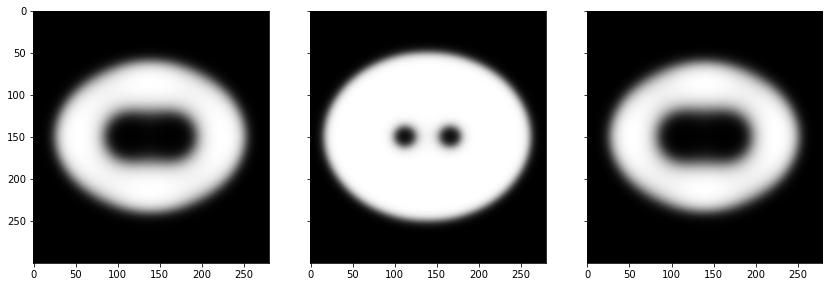

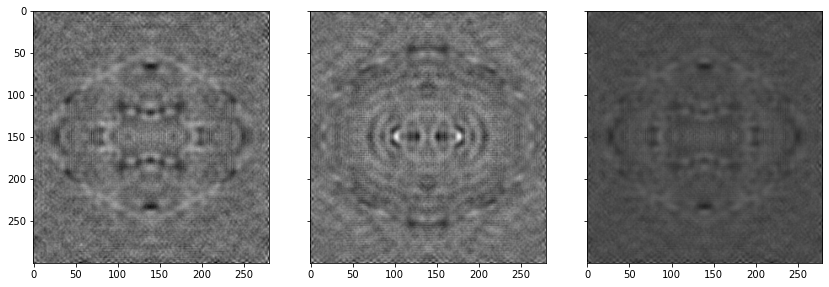


 1600: E = 8.77e+01, 
 1700: E = 8.69e+01, 
 1800: E = 8.64e+01, 
 1900: E = 8.59e+01, 
 2000: E = 8.54e+01, 
 
 at eval 2000
grad_L1mean = 1.8563e-05
latex_grad_max = 2.4886e-02
m =   -0.641 

E = 85.35558319091797
at BFGS iteration 95 and eval 2015,   umin = -1.0009117126464844, umax = 1.0000663995742798


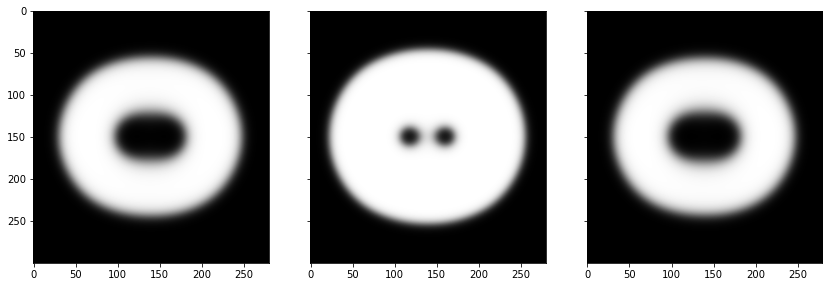

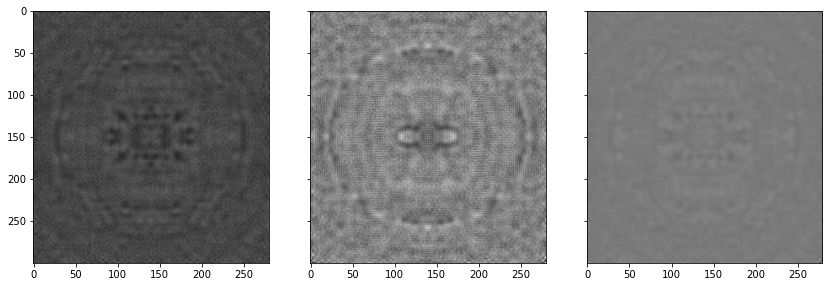


 2100: E = 8.51e+01, 
 2200: E = 8.50e+01, 
 2300: E = 8.48e+01, 
 2400: E = 8.47e+01, 
 2500: E = 8.47e+01, 
 
 at eval 2500
grad_L1mean = 6.0645e-06
latex_grad_max = 2.3843e-03
m =   -0.624 

E = 84.71250915527344
at BFGS iteration 119 and eval 2519,   umin = -1.0004668235778809, umax = 1.0000227689743042


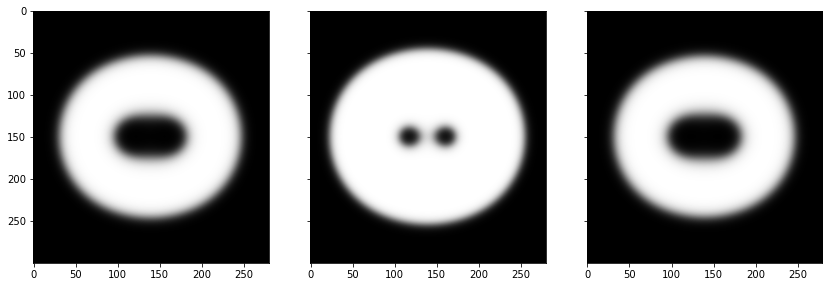

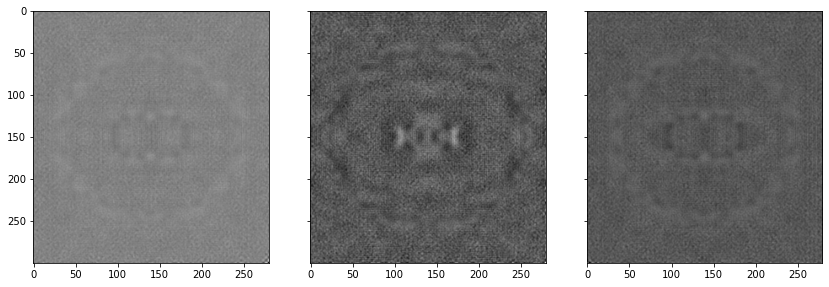


 2600: E = 8.47e+01, 
 2700: E = 8.46e+01, 
 2800: E = 8.46e+01, 
 2900: E = 8.45e+01, 
 3000: E = 8.45e+01, 
 
 at eval 3000
grad_L1mean = 6.1236e-06
latex_grad_max = 7.7551e-03
m =   -0.621 

E = 84.49774169921875
at BFGS iteration 142 and eval 3002,   umin = -1.0000559091567993, umax = 1.0000346899032593


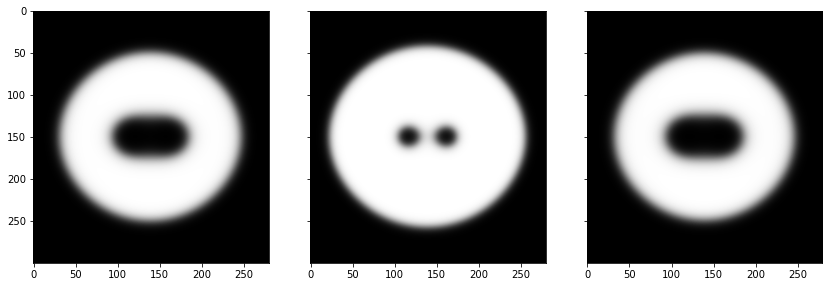

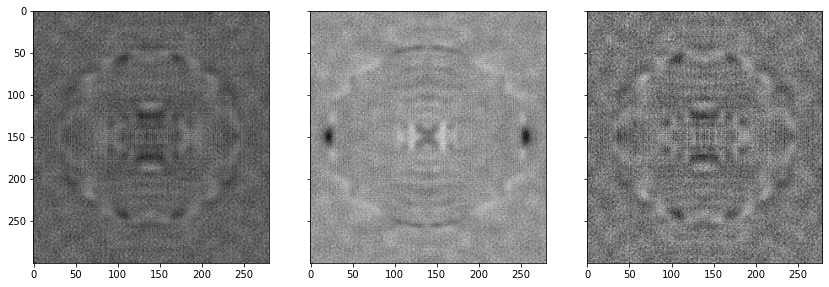


 3100: E = 8.44e+01, 
 3200: E = 8.44e+01, 
 3300: E = 8.43e+01, 
 3400: E = 8.42e+01, 
 3500: E = 8.42e+01, 
 
 at eval 3500
grad_L1mean = 6.3829e-06
latex_grad_max = 1.2476e-03
m =   -0.609 

E = 84.15563201904297
at BFGS iteration 166 and eval 3506,   umin = -1.000118613243103, umax = 1.000043272972107


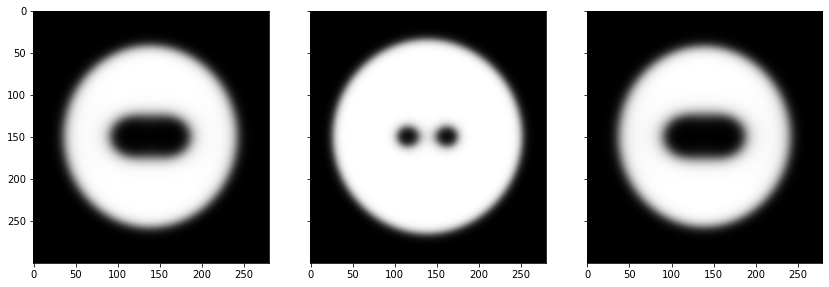

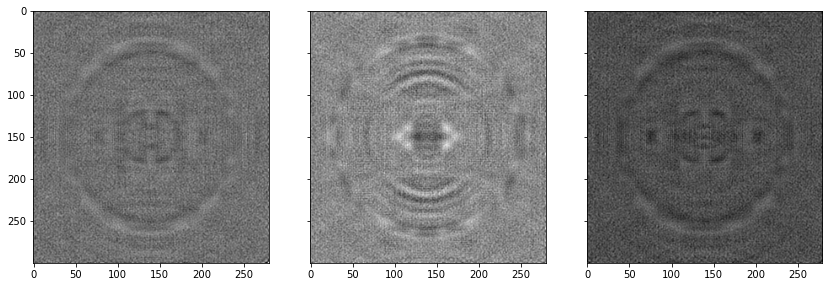


 3600: E = 8.41e+01, 
 3700: E = 8.41e+01, 
 3800: E = 8.40e+01, 
 3900: E = 8.40e+01, 
 4000: E = 8.40e+01, 
 
 at eval 4000
grad_L1mean = 5.5433e-06
latex_grad_max = 1.2139e-03
m =   -0.589 

E = 83.97748565673828
at BFGS iteration 190 and eval 4010,   umin = -1.0003174543380737, umax = 1.000018835067749


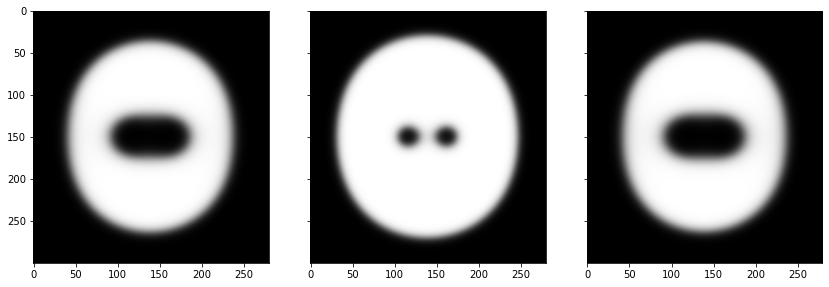

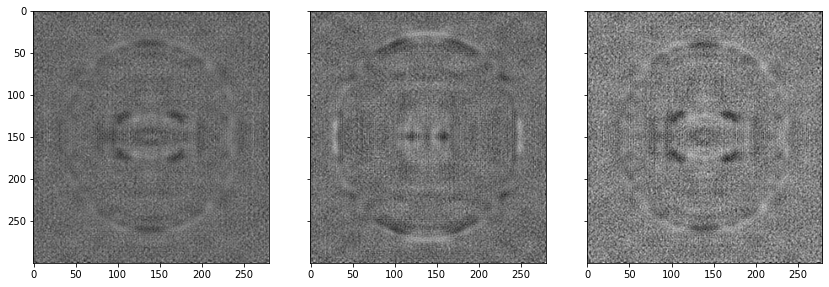

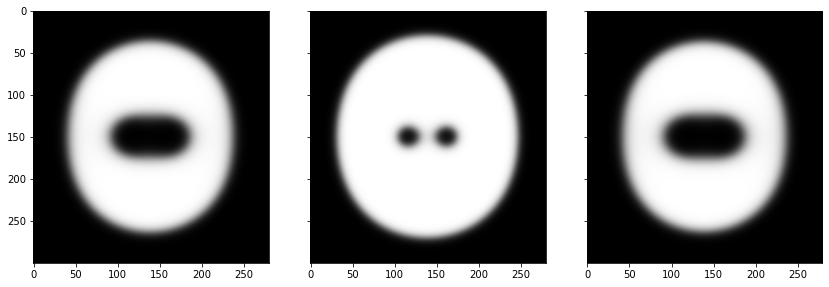

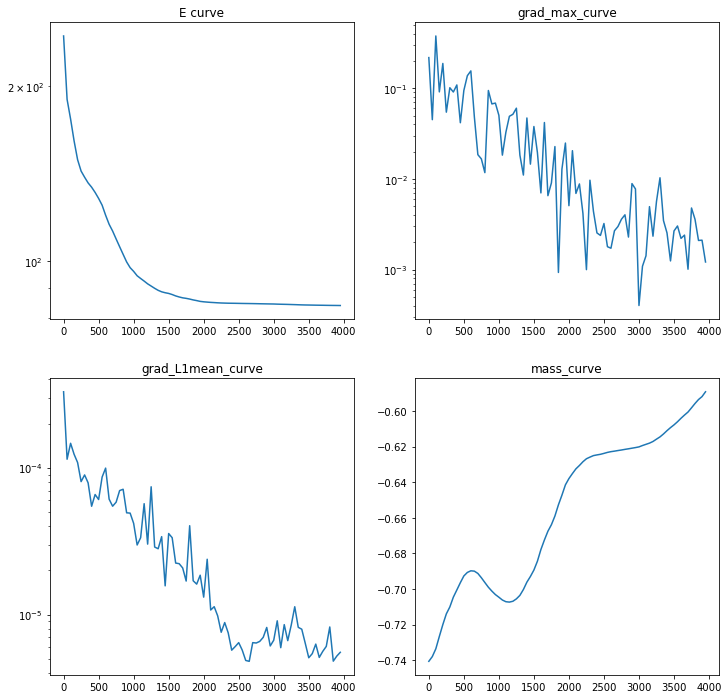


TOTAL DURATION IN SECONDS 830.5884227752686
E = 83.9742
polykap_deg2 bfgs L2 replicate coeffs [1 2 1 0 0 0]
dx = 0.010 LZ = 1.50 LX = 3.000 LY = 2.800 xi = 1e-06
{'maxeval': 4000, 'sigma_blur': 1, 'lr': 1, 'bfgs_max_iter': 20, 'history_size': 10, 'line_search_fn': 'strong_wolfe', 'display_it_nb': 500, 'fill_curve_nb': 50}


In [26]:
u,E = Willmore_flow(v0, maxeval = 4000) # long simulation

In [28]:
sigma = 4 / (3 * np.sqrt(2)) 

print(E / (4 * sigma)) # around 22.2 ~ 22.3

22.26702772572257
